## Processing demographic data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
datasets = ["Aspirational India", "Consumption Pyramids", "Household income", "PeopleOfIndia"]
datasets_lower = [dataset.lower().replace(" ", "_") for dataset in datasets]

# Load the DataFrames into a nested dictionary. The first key is the name of the dataset, the second key is Davanagere or rural Karnataka.
dfs = {}
for dataset in datasets_lower:
    dfs[dataset] = {}
    for location in ["davanagere", "karnataka_rural"]:
        df = pd.read_pickle(f"pickles/{dataset}_{location}.pickle")
        dfs[dataset][location] = df

In [3]:
agri_groups = ["Organised Farmers", "Agricultural Labourers", "Small/Marginal Farmers"]

## Processing household income data

In [4]:
dfi = dfs["household_income"]

In [5]:
print(dfi["davanagere"].columns.tolist())

['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM', 'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS', 'REASON_FOR_NON_RESPONSE', 'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS', 'HH_WEIGHT_FOR_STATE_MS', 'HH_NON_RESPONSE_MS', 'HH_NON_RESPONSE_FOR_COUNTRY_MS', 'HH_NON_RESPONSE_FOR_STATE_MS', 'AGE_GROUP', 'OCCUPATION_GROUP', 'EDUCATION_GROUP', 'GENDER_GROUP', 'SIZE_GROUP', 'TOTAL_INCOME', 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES', 'INCOME_OF_ALL_MEMBERS_FROM_WAGES', 'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES', 'INCOME_OF_HOUSEHOLD_FROM_RENT', 'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION', 'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS', 'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT', 'date_collected', 'INCOME_OF_ALL_MEMBERS_FROM_PENSION', 'INCOME_OF_ALL_MEMBERS_FROM_DIVIDEND', 'INCOME_OF_ALL_MEMBERS_FROM_INTEREST', 'INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS', 'INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET', 'INCOME_OF_HOUSEHOLD_FROM_GAMBLING', 'FAMILY_SHIFTED', 'INCOME_OF_ALL_MEMBERS_FROM_FD_PF_INS

In [6]:
for location, df in dfi.items():
    # Convert the dates from "%b %Y" to YYYY-MM format
    df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")

In [7]:
# Select all farmers and agricultural OCCUPATION_GROUP
farmers = {}
for location, df in dfi.items():
    farmers[location] = df[df["OCCUPATION_GROUP"].isin(agri_groups)]

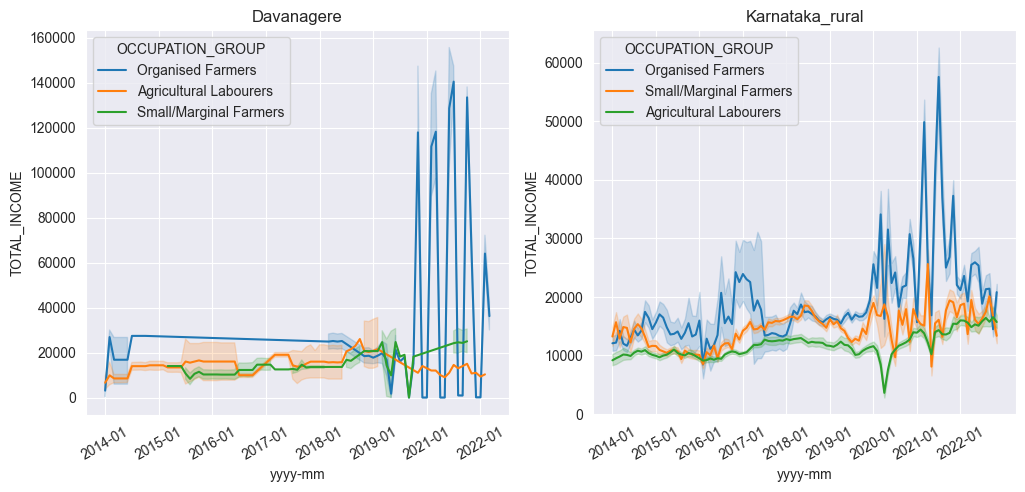

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of income over time according to the different OCCUPATION_GROUPs
for i, (location, df) in enumerate(farmers.items()):
    # df = df.reset_index()
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="yyyy-mm", y="TOTAL_INCOME", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    # Set x-axis to show every 12 months. Rotate the labels 45 degrees.
    axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=30)
plt.savefig(f"images/income_over_time.png", dpi=200)

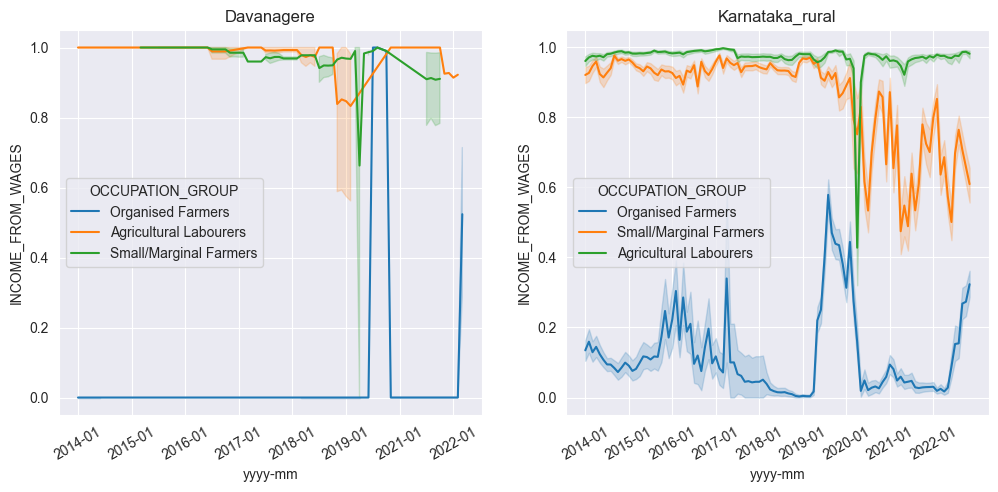

In [9]:
# Plot the percentage of income from wages (INCOME_OF_ALL_MEMBERS_FROM_WAGES divided by TOTAL_INCOME)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (location, df) in enumerate(farmers.items()):
    df = df.reset_index()
    df["INCOME_FROM_WAGES"] = df["INCOME_OF_ALL_MEMBERS_FROM_WAGES"] / df["TOTAL_INCOME"]
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="yyyy-mm", y="INCOME_FROM_WAGES", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=30)
plt.savefig(f"images/income_from_wages.png", dpi=200)

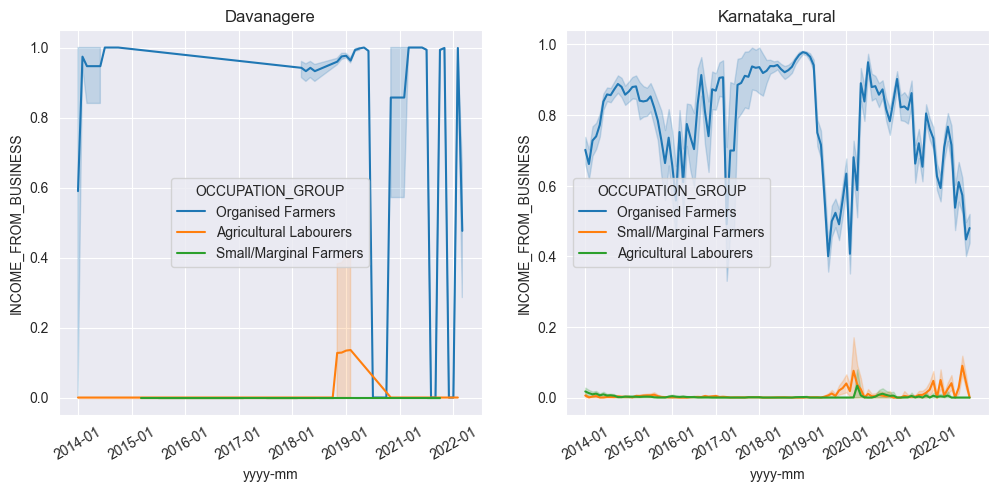

In [10]:
# Same for INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (location, df) in enumerate(farmers.items()):
    df = df.reset_index()
    df["INCOME_FROM_BUSINESS"] = df["INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT"] / df["TOTAL_INCOME"]
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="yyyy-mm", y="INCOME_FROM_BUSINESS", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=30)
plt.savefig(f"images/income_from_business.png", dpi=200)

The main limitation from the plots above, is that it only shows which kind of income (wage, business, etc.) is the most important for each occupation group. It does not show from which source the income comes from. For example, a farmer can have income from wages, but it can be partly from a non-agricultural job. The plots below show the percentage of income from wages, but only for wages in total and not from only agricultural wages.

## Processing the consumption pyramid data

In [11]:
dfc = dfs["consumption_pyramids"]

In [12]:
main_columns = ["TOTAL_EXPENDITURE", "MONTHLY_EXPENSE_ON_FOOD", "MONTHLY_EXPENSE_ON_INTOXICANTS", "MONTHLY_EXPENSE_ON_CLOTHING_AND_FOOTWEAR", "MONTHLY_EXPENSE_ON_COSMETIC_AND_TOILETRIES", "MONTHLY_EXPENSE_ON_APPLIANCES", "MONTHLY_EXPENSE_ON_RESTAURANTS", "MONTHLY_EXPENSE_ON_RECREATION", "MONTHLY_EXPENSE_ON_BILLS_AND_RENT", "MONTHLY_EXPENSE_ON_POWER_AND_FUEL", "MONTHLY_EXPENSE_ON_TRANSPORT", "MONTHLY_EXPENSE_ON_COMMUNICATION_AND_INFO", "MONTHLY_EXPENSE_ON_EDUCATION", "MONTHLY_EXPENSE_ON_HEALTH", "MONTHLY_EXPENSE_ON_ALL_EMIS", "MONTHLY_EXPENSE_ON_MISCELLANEOUS"]

In [13]:
# Keep only the first 23 columns and the main columns
for location, df in dfc.items():
    columns_to_keep = df.columns[:23].tolist() + main_columns
    dfc[location] = df[columns_to_keep]

In [14]:
farmers2 = {}
for location, df in dfc.items():
    farmers2[location] = df[df["OCCUPATION_GROUP"].isin(agri_groups)]

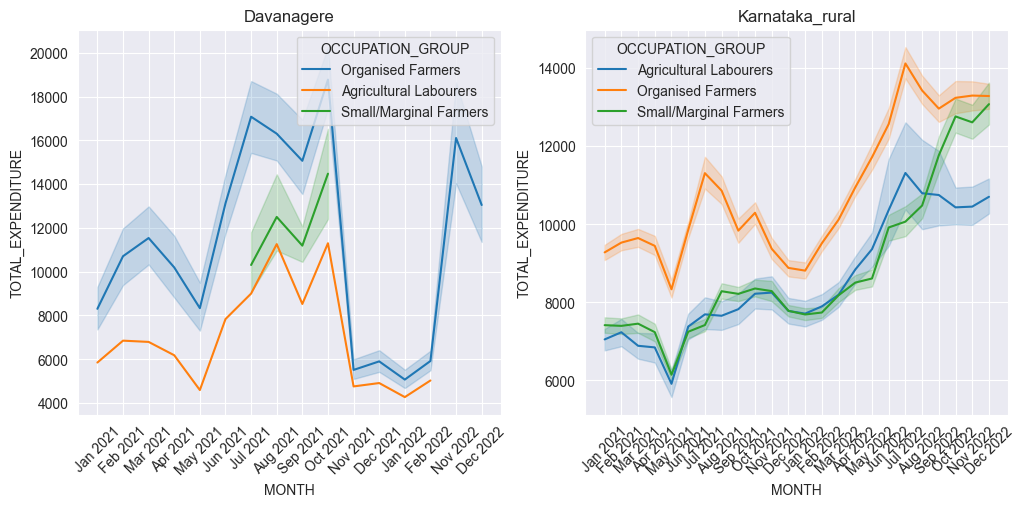

In [15]:
# Create a plot to compare the total expenditure of different agricultural groups
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (location, df) in enumerate(farmers2.items()):
    df = df.reset_index()
    sns.lineplot(data=df, hue="OCCUPATION_GROUP", x="MONTH", y="TOTAL_EXPENDITURE", ax=axes[i], errorbar=("ci", 95))
    axes[i].set_title(location.capitalize())
    # axes[i].set_xticks(axes[i].get_xticks()[::12])
    axes[i].tick_params(axis="x", rotation=45)
plt.savefig(f"images/expenditure_over_time.png", dpi=200)

#### Validate that all the columns add up to the total expenditure

In [16]:
test_df = farmers2["karnataka_rural"].copy()
test_df.head(3)

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,...,MONTHLY_EXPENSE_ON_RESTAURANTS,MONTHLY_EXPENSE_ON_RECREATION,MONTHLY_EXPENSE_ON_BILLS_AND_RENT,MONTHLY_EXPENSE_ON_POWER_AND_FUEL,MONTHLY_EXPENSE_ON_TRANSPORT,MONTHLY_EXPENSE_ON_COMMUNICATION_AND_INFO,MONTHLY_EXPENSE_ON_EDUCATION,MONTHLY_EXPENSE_ON_HEALTH,MONTHLY_EXPENSE_ON_ALL_EMIS,MONTHLY_EXPENSE_ON_MISCELLANEOUS
93166,58014227,Karnataka,HR 58,Chikkaballapura,RURAL,HR 58_RURAL_R,PSU_ID_9678,Mar 2021,Jan 2021,Accepted,...,150,0,0,1260,200,400,50,160,0,0
93167,54424873,Karnataka,HR 58,Chikkaballapura,RURAL,HR 58_RURAL_R,PSU_ID_9678,Mar 2021,Jan 2021,Accepted,...,120,0,0,740,190,320,0,350,0,900
93168,13983245,Karnataka,HR 58,Chikkaballapura,RURAL,HR 58_RURAL_R,PSU_ID_9678,Mar 2021,Jan 2021,Accepted,...,120,0,0,770,140,370,50,180,0,0


In [17]:
main_columns_without_total = main_columns[1:]

# Calculating the sum of all monthly expenses
test_df['SUM_OF_EXPENSES'] = test_df[main_columns_without_total].sum(axis=1)

# Calculating the difference between the total expenditure and the sum of all monthly expenses
test_df['DIFFERENCE'] = test_df['TOTAL_EXPENDITURE'] - test_df['SUM_OF_EXPENSES']

# To see how many rows have the expenses equal
equal_expenses = (test_df['DIFFERENCE'] == 0).sum()

print(f"Number of rows where 'TOTAL_EXPENDITURE' is equal to the sum of all monthly expenses: {equal_expenses} of {len(test_df)} ({equal_expenses/len(test_df)*100:.2f}%).")

Number of rows where 'TOTAL_EXPENDITURE' is equal to the sum of all monthly expenses: 25803 of 25803 (100.00%).


### Stacked grouped bar plots

In [18]:
def plot_clustered_stacked(dfall, axe, labels=None, title="Multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot.
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns)
    n_ind = len(dfall[0].index)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    l = [label.removeprefix("MONTHLY_EXPENSE_ON_").capitalize().replace("_", " ") for label in l]
    l = [label if label != "All emis" else "All EMIs" for label in l]

    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(dfall[0].index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    axe.add_artist(l1)
    return axe

In [19]:
# Get the list of unique occupation groups
occ_groups = df["OCCUPATION_GROUP"].unique()

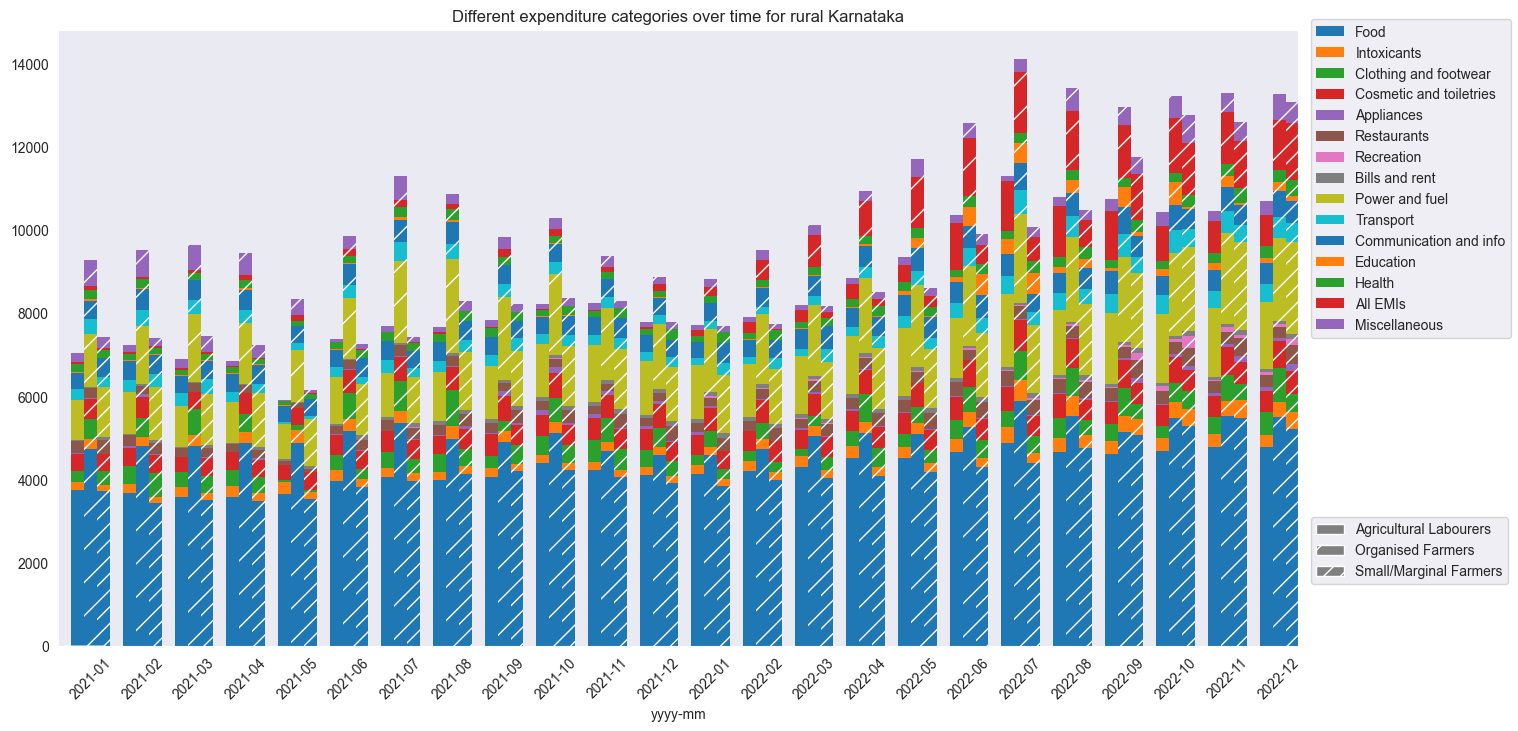

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

df = farmers2["karnataka_rural"].copy()
df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")

# Create a DataFrame for each occupation group
dfs = [df[df["OCCUPATION_GROUP"] == occ_group].groupby("yyyy-mm")[main_columns_without_total].mean() for occ_group in occ_groups]

# Plot the data
plot_clustered_stacked(dfs, axe=ax, labels=occ_groups)
ax.set_title("Different expenditure categories over time for rural Karnataka")
# Rotate the x-axis labels
ax.tick_params(axis="x", rotation=45)

#plt.tight_layout()
plt.savefig("images/mean_monthly_expenses.png", dpi=300)

**Observations**
  - Food and power and fuel, are the largest expenses,
  - Expenses in this region in India is rising for all occupation groups
  - Equated monthly installment (EMI) costs all rising for all groups, with the trend starting for organised farmers
  - Bills and rent is remarkably low?

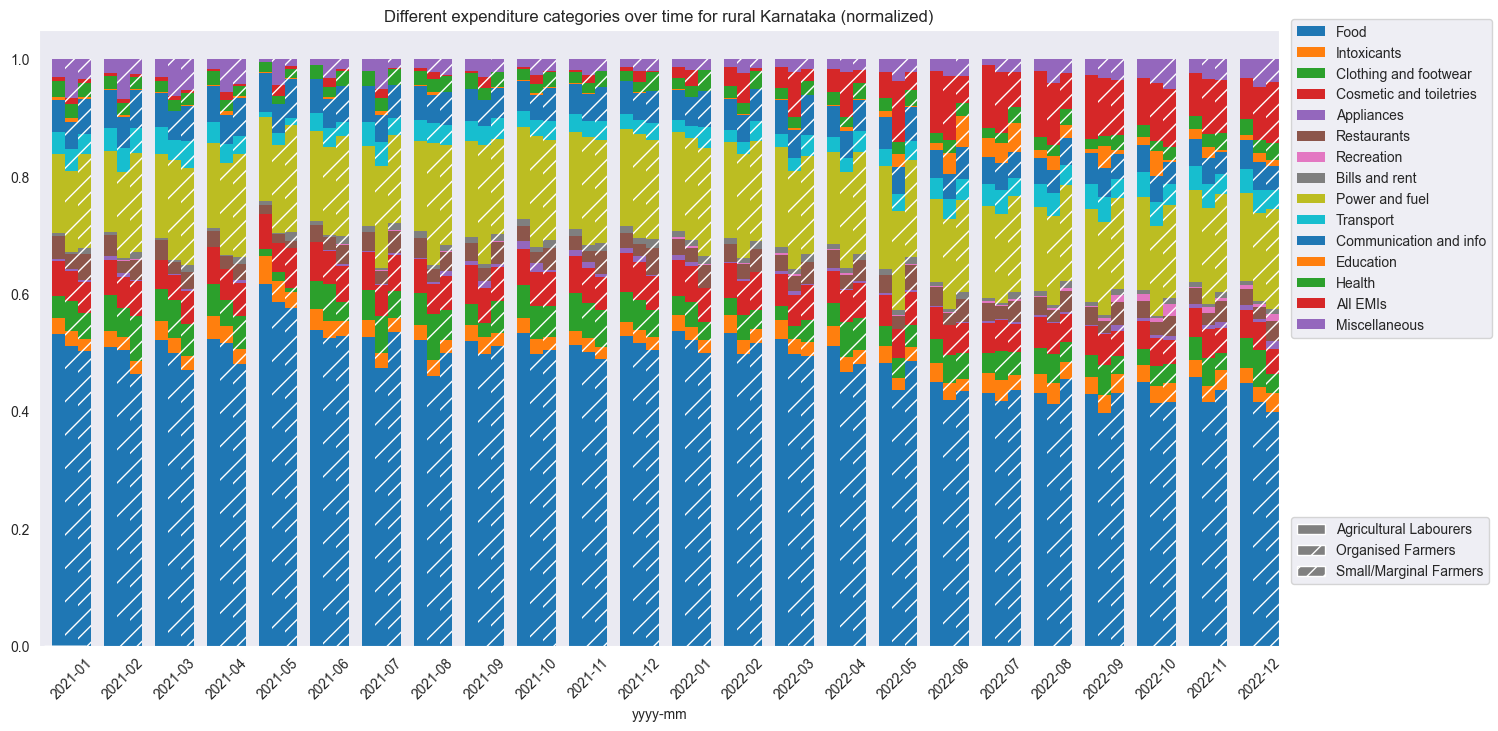

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

df = farmers2["karnataka_rural"].copy()
df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")

# Create a DataFrame for each occupation group
dfs = [df[df["OCCUPATION_GROUP"] == occ_group].groupby("yyyy-mm")[main_columns_without_total].mean() for occ_group in occ_groups]
dfs = [df.div(df.sum(axis=1), axis=0) for df in dfs]  # normalize the dataframes

# Plot the data
plot_clustered_stacked(dfs, axe=ax, labels=occ_groups)
ax.set_title("Different expenditure categories over time for rural Karnataka (normalized)")
ax.tick_params(axis="x", rotation=45)

#plt.tight_layout()
plt.savefig("images/mean_monthly_expenses_normalized.png", dpi=300)

**Addtional observations**
  - Education expenses pick up slowly

C:\Users\Ewout\AppData\Local\Temp\ipykernel_23768\2188630962.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")
C:\Users\Ewout\AppData\Local\Temp\ipykernel_23768\2188630962.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")


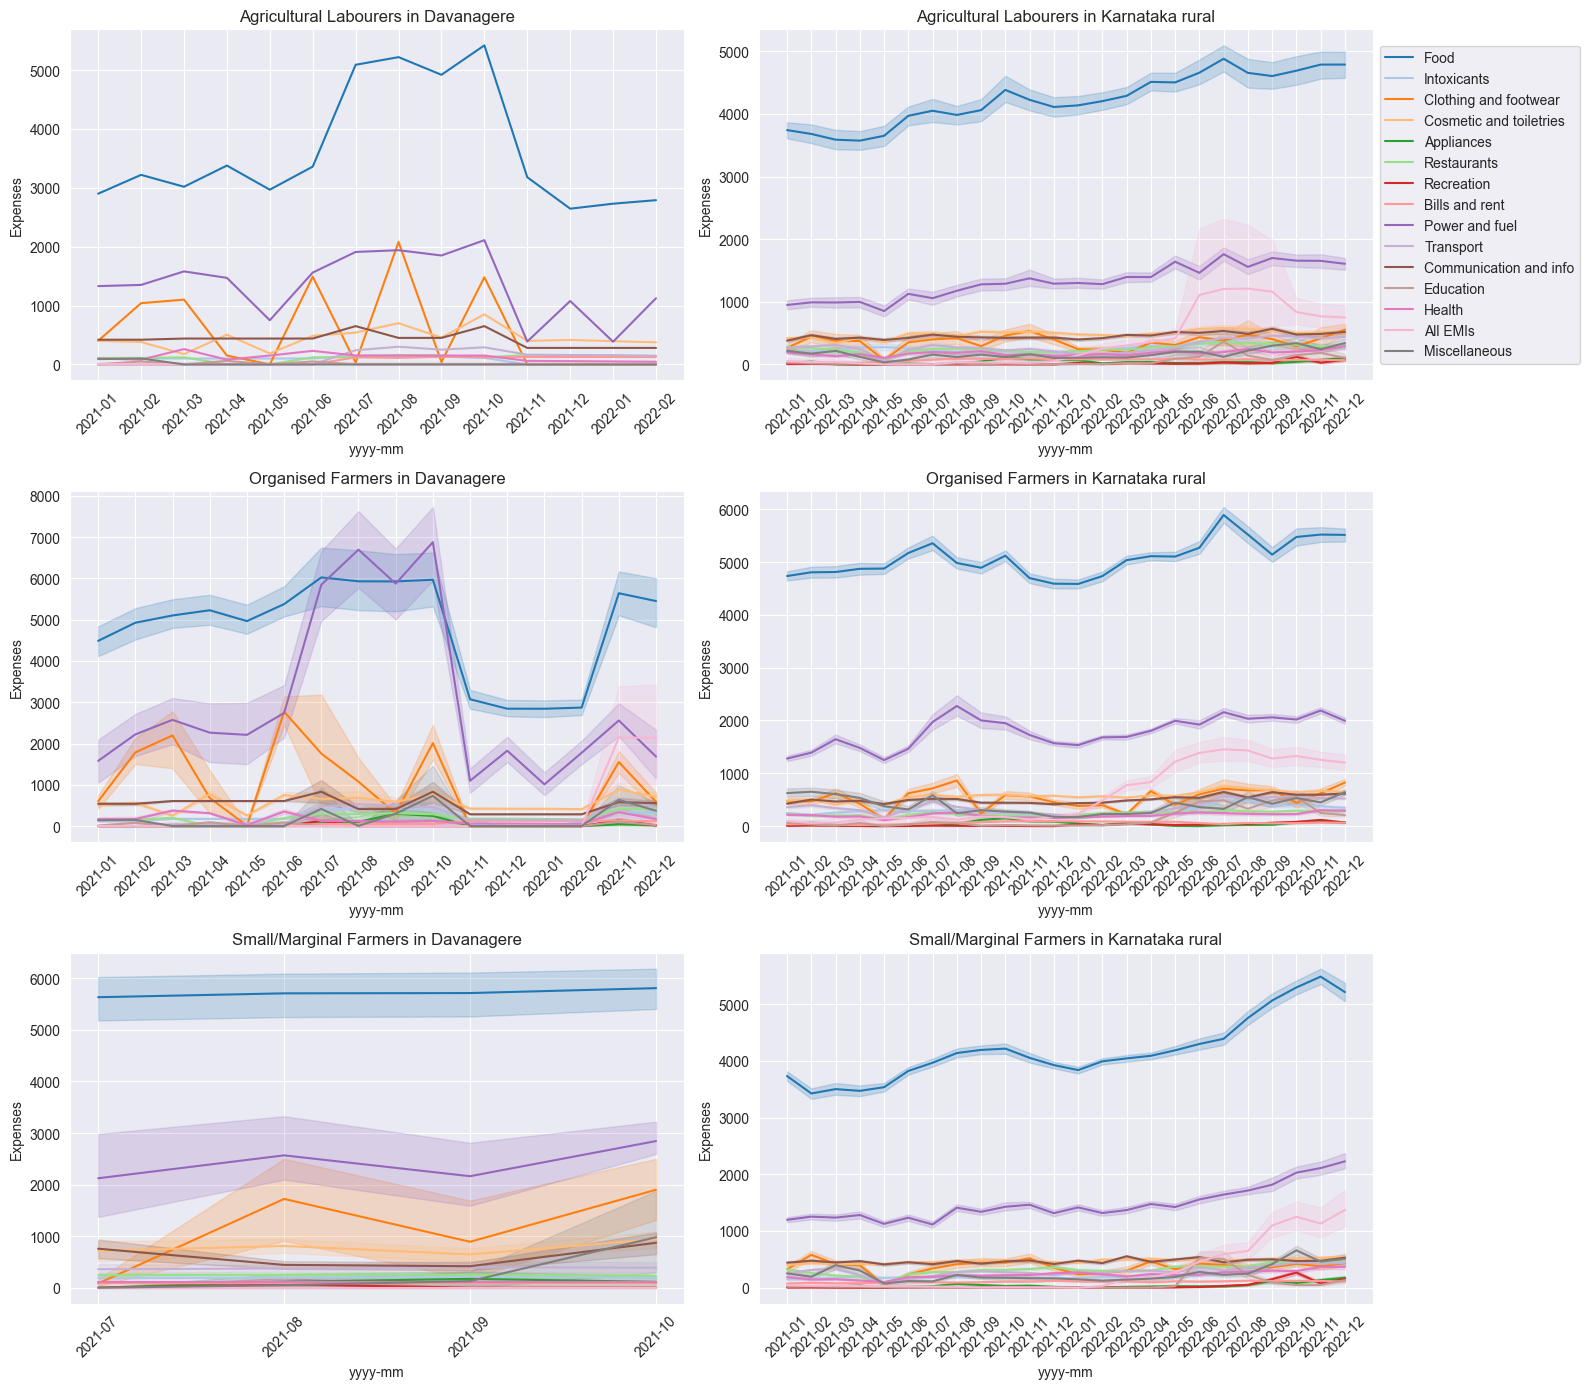

In [22]:
fig, axes = plt.subplots(len(occ_groups), 2, figsize=(16, 14))

# Get the colormap and create a color palette
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(15)]
palette = sns.color_palette(colors)

# Create a line plot for each occupation group
for j, (location, df) in enumerate(farmers2.items()):
    # Create a DataFrame for each occupation group
    df["yyyy-mm"] = pd.to_datetime(df["MONTH"], format="%b %Y").dt.strftime("%Y-%m")
    df_melted = df.melt(['yyyy-mm', 'OCCUPATION_GROUP'], main_columns_without_total, var_name='Expense Group', value_name='Expenses')
    for i, occ_group in enumerate(occ_groups):
        sns.lineplot(data=df_melted[df_melted['OCCUPATION_GROUP'] == occ_group], x='yyyy-mm', y='Expenses', hue='Expense Group', errorbar=("ci", 95), palette=palette, ax=axes[i,j])
        axes[i,j].set_title(f"{occ_group} in {location.capitalize().replace('_', ' ')}")
        axes[i,j].tick_params(axis='x', rotation=45)

        if i != 0 or j != 1:
            axes[i,j].get_legend().remove()
        else:
            h,l = axes[i,j].get_legend_handles_labels() # get the handles we want to modify
            l = [label.removeprefix("MONTHLY_EXPENSE_ON_").capitalize().replace("_", " ") for label in l]
            l = [label if label != "All emis" else "All EMIs" for label in l]
            axes[i,j].legend(handles=h, labels=l, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig("images/mean_monthly_expenses_lineplot.png", dpi=300)

**Addtional observations**
  - Both food and power and fuel expenses are increasing, mainly for small/marginal farmers.
  - EMIs expenses are increasing though all groups

## Aspirational India

## People of India